#  In-class Labexercise
## Case-study 1 ( KNN)

### 1.1 Load the libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 Read the dataset(PlayTennis.csv):

In [2]:
df = pd.read_csv('PlayTennis.csv')
df.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


### 1.3 Use the  LabelEncoder(Concerting categarical to Numarical data)

In [3]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df = df.apply(LabelEncoder().fit_transform)
df.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


### 1.4 Extract the independent variable X and dependent variable Y?

In [4]:
X = df.drop(columns = 'Play Tennis')
y = df['Play Tennis']

### 1.5 Visualize the data:(countplot)

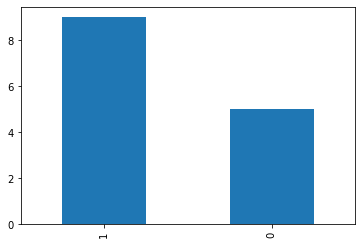

1    9
0    5
Name: Play Tennis, dtype: int64


In [5]:
df['Play Tennis'].value_counts().plot.bar()
plt.show()
print(df['Play Tennis'].value_counts())

### 1.6 Split the data into train and test set:(70/30)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

### 1.7 Train a knn

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_train = knn.predict(X_train)
y_prob_train = knn.predict_proba(X_train)[:,1]

### 1.8 Predict the model:

In [10]:
y_pred_test = knn.predict(X_test)
y_prob_test = knn.predict_proba(X_test)[:,1]

### 1.9 Evaluation the model:(classification_report)

In [11]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

In [12]:
print('Accuracy of KNN on Train Data:', accuracy_score(y_pred_train, y_train))
print('Accuracy of KNN on Test Data:', accuracy_score(y_pred_test, y_test))

Accuracy of KNN on Train Data: 0.7777777777777778
Accuracy of KNN on Test Data: 0.6


In [13]:
print('ROC AUC Score for Train Data:', roc_auc_score(y_train, y_prob_train))
print('ROC AUC Score for Test Data:', roc_auc_score( y_test, y_prob_test))

ROC AUC Score for Train Data: 0.825
ROC AUC Score for Test Data: 0.75


# Case-study 2  (NB)

### 2.1 Importing the dataset(pima-indians-diabetes.data)

In [14]:
df1 = pd.read_csv('diabetes.csv')
df1.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [15]:
df1 = pd.concat([df1,pd.DataFrame(df1.columns)],axis=1)
df1 = df1.drop(columns=0)
df1.columns = ['A','B','C','D','E','F', 'G', 'H', 'I']

In [16]:
df1

,A,B,C,D,E,F,G,H,I
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


### 2.2 Find out the feature columns

In [17]:
df1.columns

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'], dtype='object')

### 2.3 Extract the independent variable X and dependent variable Y?

In [18]:
X = df1.drop(columns = 'I')
y = df1['I']

### 2.4 Split the data into train and test set:(70/30)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

### 2.5 Train a GaussianNB?

In [20]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### 2.6 Predict the model:

In [21]:
y_pred_train = clf.predict(X_train)
y_prob_train = clf.predict_proba(X_train)[:,1]

y_pred_test = clf.predict(X_test)
y_prob_test = clf.predict_proba(X_test)[:,1]

### 2.7 Evaluation the model:(classification_report)

In [25]:
print('Accuracy of Gausian on Train Data:', accuracy_score(y_pred_train, y_train))
print('Accuracy of Gausian on Test Data:', accuracy_score(y_pred_test, y_test))


print('ROC AUC Score for Train Data:', roc_auc_score(y_train, y_prob_train))
print('ROC AUC Score for Test Data:', roc_auc_score( y_test, y_prob_test))

import sklearn.metrics as metrics

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

classification_report(y_test, y_pred_test)

Accuracy of Gausian on Train Data: 0.7667910447761194
Accuracy of Gausian on Test Data: 0.7445887445887446
ROC AUC Score for Train Data: 0.8326550913365889
ROC AUC Score for Test Data: 0.7937402462285417


'              precision    recall  f1-score   support\n\n           0       0.81      0.82      0.82       158\n           1       0.60      0.58      0.59        73\n\n    accuracy                           0.74       231\n   macro avg       0.70      0.70      0.70       231\nweighted avg       0.74      0.74      0.74       231\n'

### 2.8 Conclusion:



In [23]:
## The Gausssian's Model works good on test data

### 2.9 Confusion matrix

In [26]:
confusion_matrix(y_train, y_pred_train)

array([[289,  53],
       [ 72, 122]], dtype=int64)

In [28]:
confusion_matrix(y_test, y_pred_test)

array([[130,  28],
       [ 31,  42]], dtype=int64)

### 2.11 print the first 25 true and predicted responses

In [30]:
print(y_test[:25])
print(y_pred_test[:25])

285    0
101    0
581    0
352    0
632    0
472    0
233    0
385    1
556    0
59     0
755    0
341    0
445    0
614    0
371    0
355    1
19     0
710    0
430    0
117    0
493    0
218    1
159    0
666    1
553    0
Name: I, dtype: int64
[1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


### 2.12 save confusion matrix and slice into four pieces

In [32]:
tn, tp, fn, fp = confusion_matrix(y_test, y_pred_test).ravel()
print(tn)
print(tp)
print(fn)
print(fp)

130
28
31
42


### 2.13 Metrics computed from a confusion matrix

Classification Accuracy: Overall, how often is the classifier correct?

In [33]:
total = tn + tp + fn + fp
(tp + tn)/total

0.683982683982684

Classification Error: Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate"

In [34]:
(fp+fn)/total

0.31601731601731603

Sensitivity: When the actual value is positive, how often is the prediction correct?



In [35]:
tp/(fn+tp)

0.4745762711864407

Specificity: When the actual value is negative, how often is the prediction correct?



In [36]:
tn/(tn+fp)

0.7558139534883721

False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

In [37]:
fp/(fp+tn)

0.2441860465116279

Precision: When a positive value is predicted, how often is the prediction correct?

How "precise" is the classifier when predicting positive instances?

In [38]:
tp/(fp+tp)

0.4

### 2.14 Adjusting the classification threshold?

In [40]:
y_prob_train = clf.predict_proba(X_train)[:,1]
prob_plot = pd.DataFrame([y_prob_train,y_train])
prob_plot = prob_plot.T
prob_plot.head()

,0,1
0,0.017132,0.0
1,0.530810,1.0
2,0.037989,0.0
3,0.585440,0.0
4,0.018461,0.0


#### print the first 10 predicted responses?

In [41]:
prob_plot[1][:10]

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    1.0
8    0.0
9    0.0
Name: 1, dtype: float64

#### print the first 10 predicted probabilities of class membership

In [42]:
prob_plot[0][:10]

0    0.017132
1    0.530810
2    0.037989
3    0.585440
4    0.018461
5    0.054294
6    0.034375
7    0.449180
8    0.010174
9    0.289634
Name: 0, dtype: float64

#### print the first 10 predicted probabilities for class 1

In [43]:
prob1 = prob_plot[(prob_plot[1]==1.0)]
prob1[0][:10]

1     0.530810
7     0.449180
12    0.121398
15    0.193705
30    0.995769
34    0.372912
36    0.045515
48    0.053893
50    0.958785
51    0.827930
Name: 0, dtype: float64

#### store the predicted probabilities for class 1

In [44]:
a = prob1[0]

#### plot histogram of predicted probabilities

#### create 8 bins

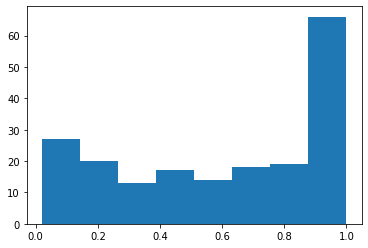

In [45]:
plt.hist(a,bins=8)   ##Probability dist of 1 predicted probabilities
plt.show()

### print the first 10 predicted probabilities

In [46]:
prob_plot[0][:10]

0    0.017132
1    0.530810
2    0.037989
3    0.585440
4    0.018461
5    0.054294
6    0.034375
7    0.449180
8    0.010174
9    0.289634
Name: 0, dtype: float64

### create new confusion matrix 

In [48]:
confusion_matrix(y_test,y_pred_test)

array([[130,  28],
       [ 31,  42]], dtype=int64)

### 2.14 Receiver Operating Characteristic (ROC) Curves

In [51]:
from sklearn.metrics import roc_auc_score, roc_curve

a = roc_auc_score(y_train,y_prob_train) ##AUC of train

b= roc_auc_score(y_test,y_prob_test) ##AUC of test

fpr, tpr, thresholds = roc_curve(y_train,y_prob_train)  ##Returns array of FPR, TPR, thresholds

fpr1, tpr1, thresholds1 = roc_curve(y_test,y_prob_test)

0.8326550913365889 AUC train


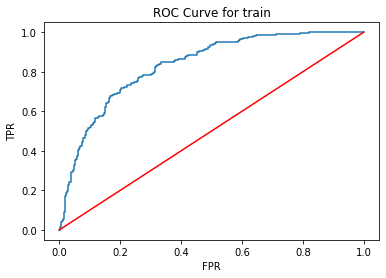

In [52]:
print(a,'AUC train')
plt.plot(fpr,tpr)   ##For train
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for train')
plt.show()

0.7937402462285417 AUC test


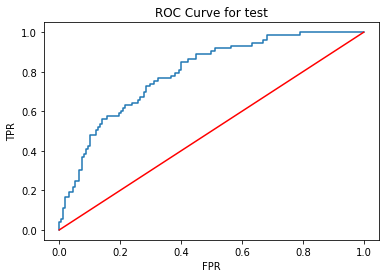

In [53]:
print(b,'AUC test')
plt.plot(fpr1,tpr1)   ##For test
plt.plot(fpr1,fpr1,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for test')
plt.show()

#### define a function that accepts a threshold and prints sensitivity and specificity

# 3. What is advantages Confusion matrix and ROC/AUC?

Advantages of Confusion Matrix:

It shows how any classification model is confused when it makes predictions.
Confusion matrix not only gives you insight into the errors being made by your classifier but also types of errors that are being made.
This breakdown helps you to overcomes the limitation of using classification accuracy alone.
Every column of the confusion matrix represents the instances of that predicted class.
Each row of the confusion matrix represents the instances of the actual class.
It provides insight not only the errors which are made by a classifier but also errors that are being made.
 
Advantages of ROC/AUC:
ROC curve is useful for comparing two or more diagnostic tests. It is more efficient way to display the relationship between sensitivity and specificity for tests that have continuous outcome, to conduct ROC using SPSS please